### 판다스 내장 그래프 도구
* 판다스는 Matplotlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포드하지 않고 간단히 그래프 그릴 수 있음.
* 선그래프 : df.plot()메소드 적용시 다른 옵션을 추가하지 않으면 가장 기본적인 선 그래프를 그림.
* 막대 그래프 : df.plot(kind='bar'), df.plot(kind='barh',stacked=True,alpha=0.8)
* 히스토그램 : df.plot(kind='hist')
* 산점도 : df.plot(x=' ', y=' ', kind='scatter'), 상관관계를 볼 수 있음.
* 박스 플롯 : df.plot(kind='box'), df.boxplot(column=['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공.

## matplotlib
- histogram : plt.hist(x, bins= )
- line plot : plt.plot(x,y)
- plt.bar(x,y, width= , color='')
- scatter plot : plt.scatter(x, y):

## seaborn
- sns.distplot(data, bins=, color=, kde=), histplot, displot으로 변경
- sns.boxplot(x, y, data, color)
- sns.violinplot(x, y, data, color)
- sns.barplot(x, y, data, color)
- sns.jointplot(x, y, data, color)
- sns.pairplot(data, hue, palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg=False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/주가데이터.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [4]:
# 1. 'Date' 칼럼을 datetime 타입으로 변환
df['NDate'] = pd.to_datetime(df['Date'])

# 2. 'NDate' 칼럼을 인덱스로 설정
df1 = df.set_index('NDate')
df1.drop(['Date','Volume'], axis=1, inplace=True)
df1.head()

,Close,Start,High,Low
NDate,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700


In [5]:
# 결과 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     object        
 1   Close   20 non-null     int64         
 2   Start   20 non-null     int64         
 3   High    20 non-null     int64         
 4   Low     20 non-null     int64         
 5   Volume  20 non-null     int64         
 6   NDate   20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


<Axes: xlabel='NDate'>

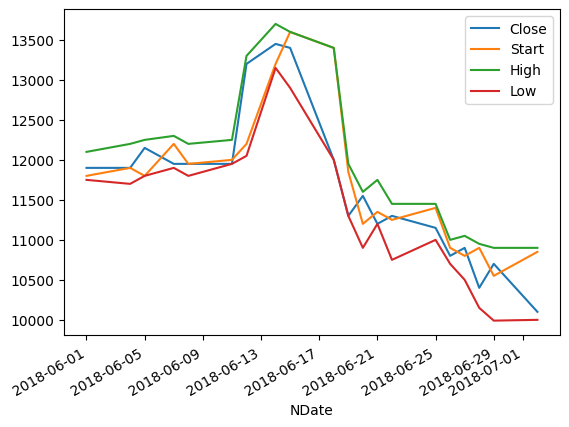

In [6]:
# 선 그래프
df1.plot()

<Axes: xlabel='NDate'>

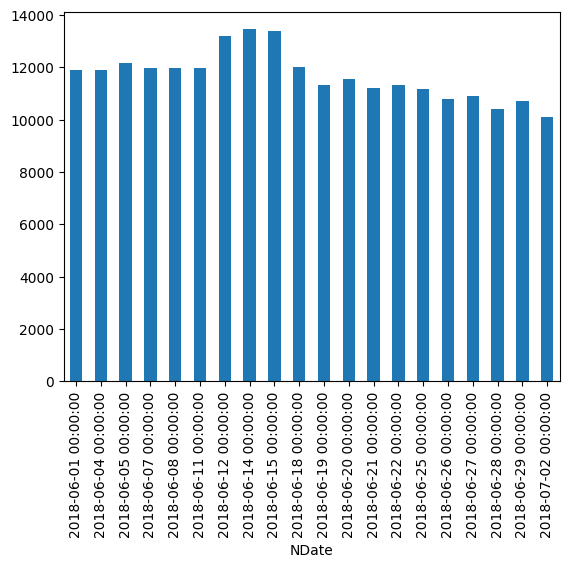

In [13]:
# 막대 그래프
df1.Close[::-1].plot(kind='bar')

Q1_0115. df1에 대하여 Close 컬럼으로 다음을 수행하세요.
- NDate 별 막대그래프
- 6월만 추출하여 Close 칼럼으로 일별막대 그래프를 표현
- 히스토그램

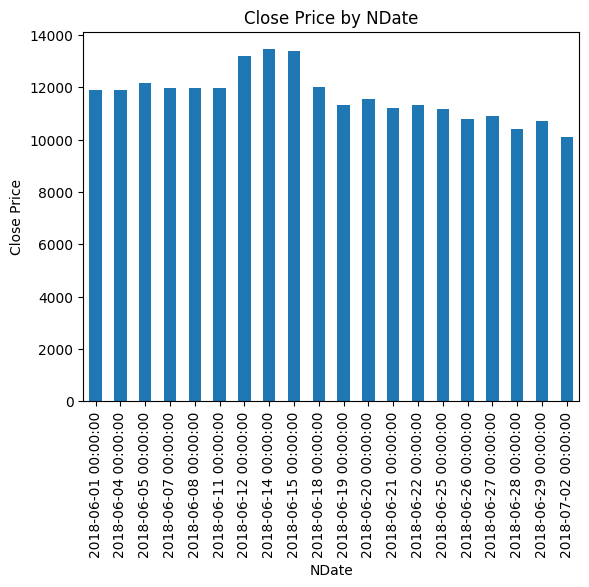

In [12]:
# Q1_0115 솔루션
# NDate 별 막대그래프
import matplotlib.pyplot as plt

# 'Close' 컬럼에 대한 막대 그래프
# df1['Close'].plot(kind='bar')
df1.Close[::-1].plot(kind='bar')


# 그래프 제목 및 레이블 설정
plt.title('Close Price by NDate')
plt.xlabel('NDate')
plt.ylabel('Close Price')

# 그래프 표시
plt.show()

Text(0, 0.5, 'Close Price')

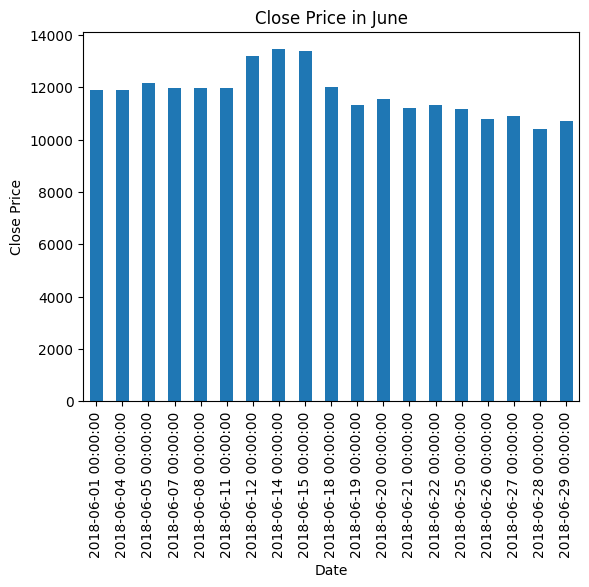

In [17]:
# Q1_0115 솔루션
# 6월만 추출하여 Close 칼럼으로 일별막대 그래프를 표현
import matplotlib.pyplot as plt

# 6월 데이터 필터링
june_data = df1[df1.index.month == 6]

# 'Close' 컬럼에 대한 막대 그래프
# june_data['Close'].plot(kind='bar')
june_data.Close[::-1].plot(kind='bar')

# 그래프 제목 및 레이블 설정
plt.title('Close Price in June')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 그래프 표시
plt.show()


<Axes: xlabel='NDate'>

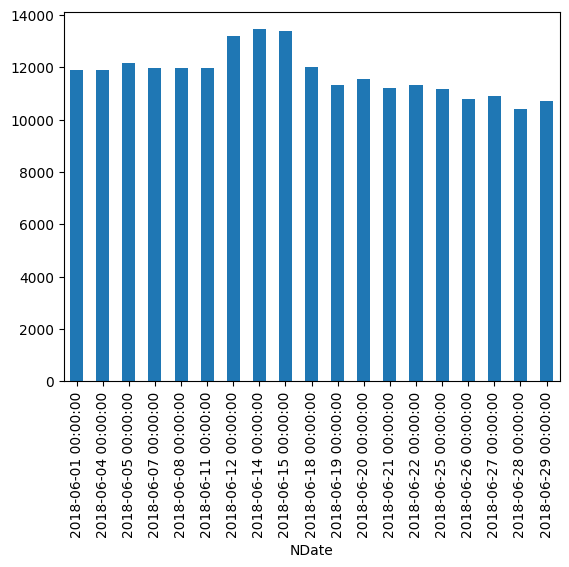

In [19]:
# Q1_0115 솔루션
# 6월만 추출하여 Close 칼럼으로 일별막대 그래프를 표현
df1.loc['2018-6','Close'][::-1].plot(kind='bar')

<Axes: xlabel='NDate'>

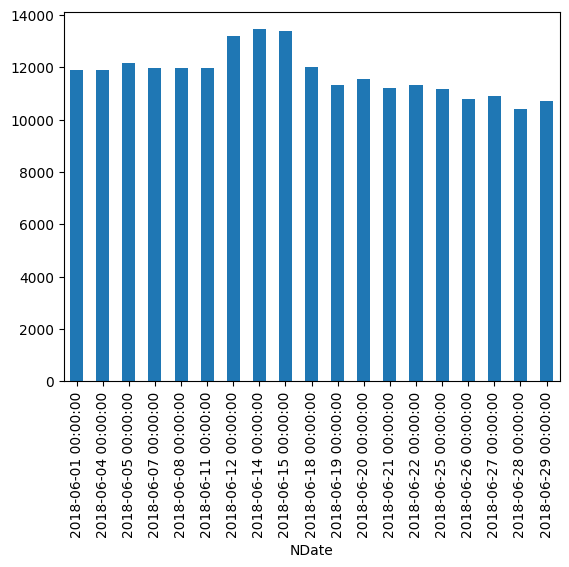

In [16]:
# Q1_0115 주승님 솔루션
# 6월만 추출하여 Close 칼럼으로 일별막대 그래프를 표현

df2 = df1.loc[:"2018-06"]
df2.Close[::-1].plot(kind = "bar")

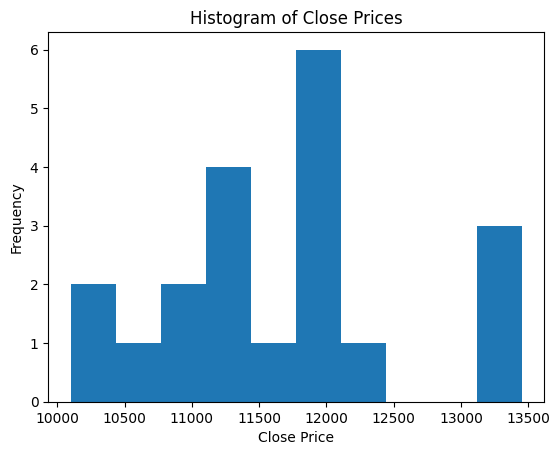

In [ ]:
# Q1_0115. 솔루션
# 히스토그램
import matplotlib.pyplot as plt

# 'Close' 컬럼에 대한 히스토그램
df1['Close'].plot(kind='hist', bins=10) # bins는 히스토그램의 막대 개수를 조절

# 그래프 제목 및 레이블 설정
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


Q2_0115. df에서 Volume 칼럼의 분포를 탐색하는 히스토그램을 표현하세요.

<Axes: ylabel='Frequency'>

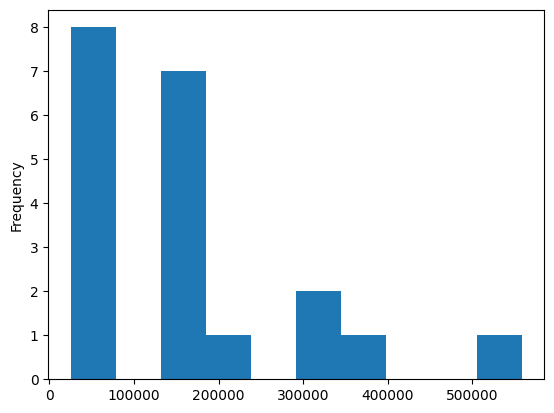

In [22]:
# Q2_0115 솔루션
# df['Volume'].plot(kind='hist', bins=10)
df.Volume.plot(kind='hist')
# plt.show()

Q3_0115. df Close 칼럼과 Volume 칼럼으로 산점도를 표현하세요.

<Axes: xlabel='Close', ylabel='Volume'>

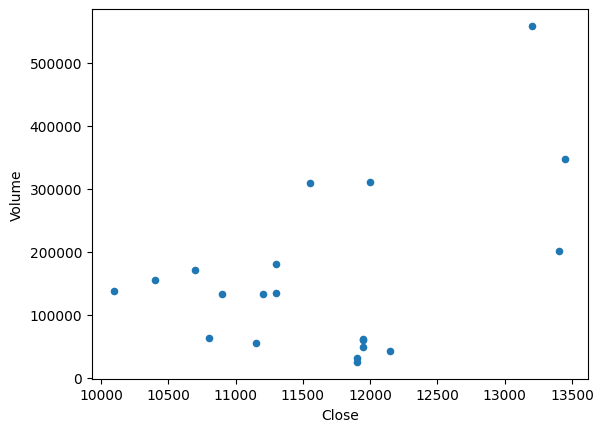

In [23]:
df.plot(kind='scatter', x='Close', y='Volume')
# plt.show()

Q4_0115. df1 Close 칼럼의 Box Plot을 표현하세요.

<Axes: >

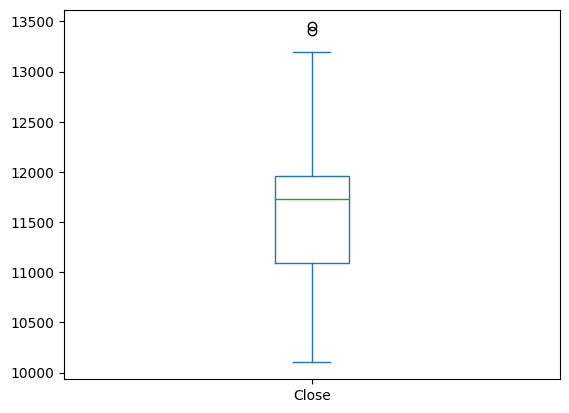

In [25]:
# Q4_0115 솔루션
# df1['Close'].plot(kind='box')
df1.Close.plot(kind='box')
# plt.show()
# 13000?보다 큰거는 o모양으로 나옴(이상치. 꼭 이상치가 있다는것은아니고 통계적으로 봤을때 이상치에 있을가능성이 있다.)
# 그래서 이상치는 없을수도 있을수도 있어서 확인을 해봐야한다.(ceo월급은 직원과 차이가 많이 난다 - 이상치가 아니라 real 월급)
# 사직원이 월급을 0을하나 더붙였음 - 이상치임.
# 막대기 위 아래는 upper 휘스커 lower 휘스커

<Axes: >

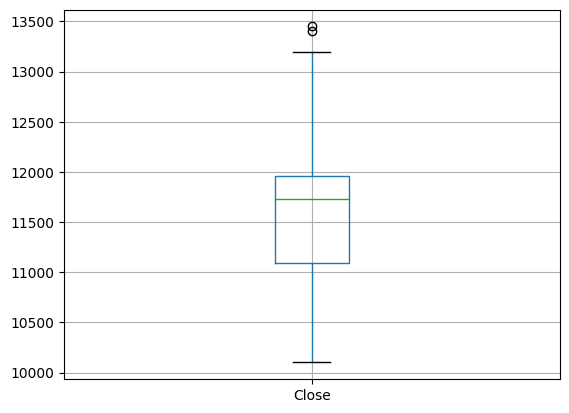

In [26]:
# Q4_0115 유빈님 솔루션
df1.boxplot(column=['Close'])

In [33]:
df.corr()
# 상관관계는 -1 부터 1 까지 1은 본인
# Volume 은 숫자가 적은데 그래도 - 는 아님
# -는 정반대로. 음의 상관관계
# 양의 상관관계는 의미가 좀 있는것임

<ipython-input-33-6f08fad37185>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Close,Start,High,Low,Volume
Close,1.000000,0.856181,0.941201,0.946297,0.441466
Start,0.856181,1.000000,0.961009,0.921467,0.337829
High,0.941201,0.961009,1.000000,0.945487,0.484145
Low,0.946297,0.921467,0.945487,1.000000,0.246323
Volume,0.441466,0.337829,0.484145,0.246323,1.000000


In [38]:
df1.Close.describe()

count       20.000000
mean     11662.500000
std        927.060294
min      10100.000000
25%      11087.500000
50%      11725.000000
75%      11962.500000
max      13450.000000
Name: Close, dtype: float64

In [40]:
df1.describe()

,Close,Start,High,Low
count,20.000000,20.000000,20.000000,20.000000
mean,11662.500000,11755.000000,12015.000000,11374.500000
std,927.060294,865.250192,907.729962,884.369981
min,10100.000000,10550.000000,10900.000000,9990.000000
25%,11087.500000,11125.000000,11350.000000,10737.500000
50%,11725.000000,11800.000000,12025.000000,11500.000000
75%,11962.500000,12050.000000,12262.500000,11912.500000
max,13450.000000,13600.000000,13700.000000,13150.000000


In [36]:
df1.Close.describe()['25%']

11087.5

#### Box plot 의미 해석

* IQR(Inter Quartile Range): 제 3사분위수(75%) - 제1사분위수(25%)
* lower whisker: Q1 - 1.5 x IQR 이내인 값중에서 최솟값
* upper whisker: Q3 + 1.5 x IQR 이내인 값중에서 최댓값
* 이상치: lower whisker, upper whisker를 벗어나는 값

In [47]:
iqr = df.Close.describe()['75%'] - df.Close.describe()['25%']
uw_check = df.Close.describe()['75%'] + iqr*1.5
print(uw_check, '\n')

c = df.Close.sort_values(ascending=False)
print(c[:5], '\n')
df.Close[df.Close > uw_check]

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 



11    13400
12    13450
Name: Close, dtype: int64

In [58]:
# Q. df에서 Close의 값이 이상치로 의심할 수 있는 관측치를 출력하세요.
iqr = df.Close.describe()['75%'] - df.Close.describe()['25%']
uw_check = df.Close.describe()['75%'] + iqr*1.5
print(uw_check, '\n')

c = df.Close.sort_values(ascending=False)
print(c[:5], '\n')
print(df.Close[df.Close > uw_check])


lw_check = df.Close.describe()['25%'] - 1.5*iqr
print(lw_check, '\n')

c2 = df.Close.sort_values(ascending=True)
print(c2[:5], '\n')
print(df.Close[df.Close < lw_check])
print("=" * 60)
# 이상치
print(df.Close[df.Close > uw_check])
print(df.Close[df.Close < lw_check])

13275.0 

12    13450
11    13400
13    13200
17    12150
10    12000
Name: Close, dtype: int64 

11    13400
12    13450
Name: Close, dtype: int64
9775.0 

0    10100
2    10400
1    10700
4    10800
3    10900
Name: Close, dtype: int64 

Series([], Name: Close, dtype: int64)
11    13400
12    13450
Name: Close, dtype: int64
Series([], Name: Close, dtype: int64)


In [59]:
# 주승님 솔루션
iqr = df["Close"].describe()["75%"] - df["Close"].describe()["25%"]
print(iqr, "\n")

uw = df["Close"].describe()["75%"] + (1.5 * iqr)
print(uw, "\n")

lw = df["Close"].describe()["25%"] - (1.5 * iqr)
print(lw, "\n")

print(df["Close"][df.Close > uw], "\n")
print(df["Close"][df.Close < lw])

875.0 

13275.0 

9775.0 

11    13400
12    13450
Name: Close, dtype: int64 

Series([], Name: Close, dtype: int64)


In [62]:
# 솔루션
Q1 = df.Close.describe()['25%']
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
abv = df[(df['Close']<(Q1-IQR*1.5))|(df['Close']>(Q3+IQR*1.5))]
abv

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15
12,2018-06-14,13450,13200,13700,13150,347451,2018-06-14


Q1_0116. Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.

In [136]:
# Q1_0116 솔루션
Q1 = df.Start.describe()['25%']
Q3 = df.Start.describe()['75%']
iqr = Q3 - Q1
lower_whisker_check = Q1 - iqr*1.5
upper_whisker_check = Q3 + iqr*1.5
abv = df[(df['Start']<lower_whisker_check)|(df['Start']>upper_whisker_check)]
# abv = df[(df['Start']<(Q1-iqr*1.5))|(df['Start']>(Q3+iqr*1.5))]
abv
# print(lower_whisker_check, upper_whisker_check)

,Date,Close,Start,High,Low,Volume,NDate
11,2018-06-15,13400,13600,13600,12900,201376,2018-06-15


<Axes: >

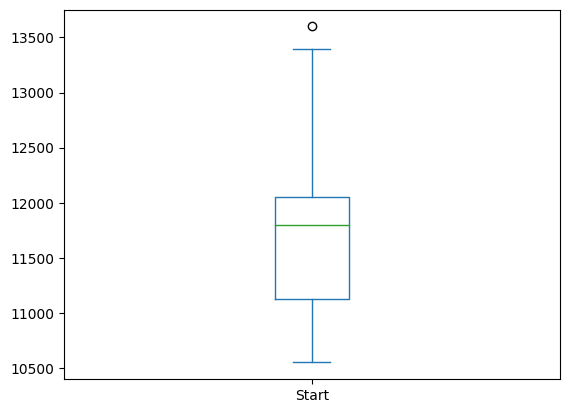

In [133]:
df.Start.plot(kind="box")

In [66]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [67]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Q. horsepower에서 문제가 되는 데이터를 horsepower의 평균값으로 대체해서 Dtype을 float64로 처리하세요.

In [72]:
df_auto.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [74]:
import numpy as np
df_auto.horsepower.replace('?', np.nan, inplace=True)
df_auto.horsepower.fillna(df_auto.horsepower.mean(), inplace=True)
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Q2_0116. mpg 칼럼의 이상치를 구하세요.(box plot, 이상치, 이상치 포함한 관측치)

<Axes: >

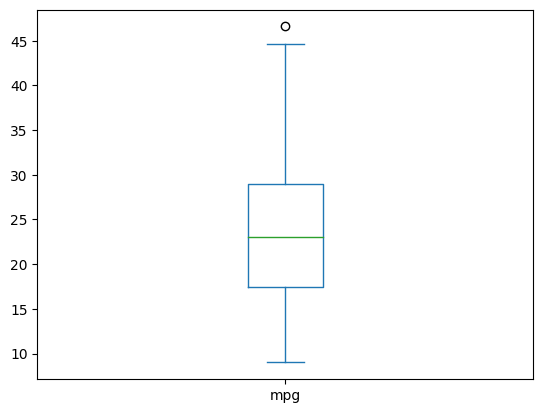

In [117]:
# Q2_0116 솔루션
# box plot
df_auto.mpg.plot(kind="box")

In [124]:
# Q2_0116 솔루션
# 이상치
Q3 = df_auto.mpg.describe()['75%']
Q1 = df_auto.mpg.describe()['25%']
iqr = Q3 - Q1
upper_whisker = Q3 + 1.5*iqr
abv = df_auto[df_auto.mpg > upper_whisker]
abv

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


In [ ]:
# Q2_0116 신미님 솔루션
# 이상치
Q1 = df_auto.mpg.describe()['25%']
Q3 = df_auto.mpg.describe()['75%']

IQR = Q3 - Q1

abv = df_auto[(df_auto['mpg']<(Q1-IQR*1.5)) | (df_auto['mpg']>(Q3+IQR*1.5))]
print("UW check값:", Q3+IQR*1.5, " / LW check값:", Q1-IQR*1.5, '\n')
abv

In [ ]:
# Q2_0116 신미님 솔루션
# boxplot
df_auto.boxplot(column=['mpg'])

In [127]:
import pandas as pd
fish_multi = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/4_fm2.csv')
fish_multi.head()
fish_multi[fish_multi['species'] == 'A']
print(fish_multi[fish_multi['species'] == 'B'])

   species  length
10       B       5
11       B       6
12       B       6
13       B       7
14       B       7
15       B       7
16       B       7
17       B       8
18       B       8
19       B       9


<Axes: xlabel='species', ylabel='length'>

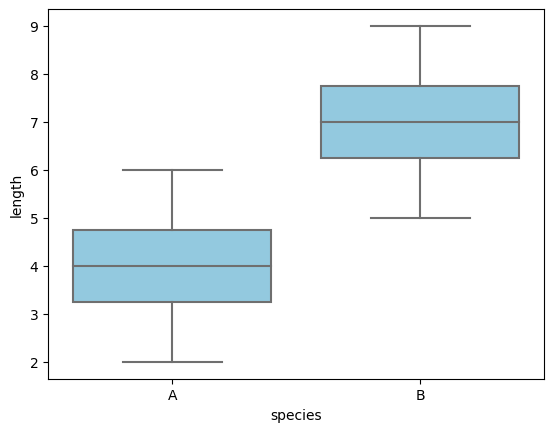

In [128]:
# fish_multi.groupby('species').plot(kind='box')
import seaborn as sns
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')

In [92]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [131]:
fish_multi.iloc[5,1] = 10
fish_multi.iloc[10,1] = 2
fish_multi.groupby('species').describe()

length                                           
         count mean       std  min   25%  50%   75%   max
species                                                  
A         10.0  4.6  2.221111  2.0  3.25  4.0  5.00  10.0
B         10.0  6.7  1.888562  2.0  6.25  7.0  7.75   9.0

Q3_0116. A, B 그룹의 Box Plot을 그리고 이상치를 구하세요.

species
A    Axes(0.125,0.11;0.775x0.77)
B    Axes(0.125,0.11;0.775x0.77)
dtype: object

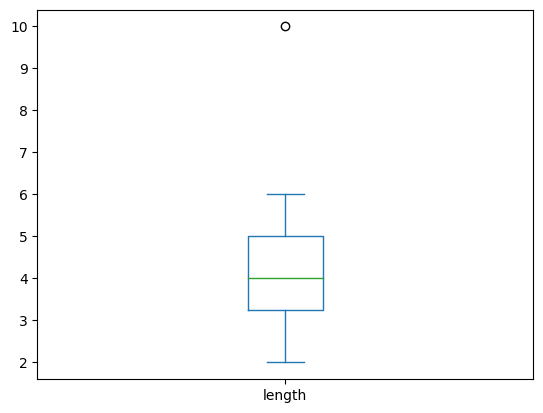

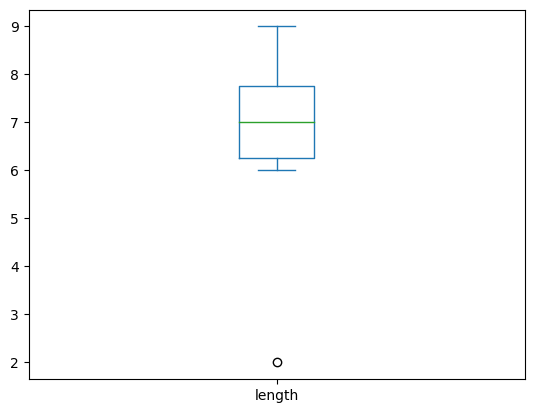

In [132]:
# Q3_0116 솔루션
# fish_multi.groupby('species').plot(kind='box')
import seaborn as sns
sns.boxplot()

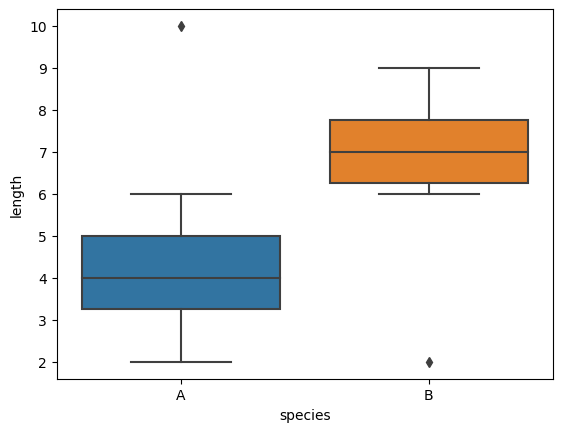

이상치 for species A:
  species  length
5       A      10

이상치 for species B:
   species  length
10       B       2



In [138]:
# Q3_0116 솔루션
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot 그리기
sns.boxplot(x='species', y='length', data=fish_multi)
plt.show()

# 이상치 계산 및 출력
for species in fish_multi['species'].unique():    #unique 특정열의 모든 고유 값을 반환
    group = fish_multi[fish_multi['species'] == species]
    Q1 = group['length'].quantile(0.25)
    Q3 = group['length'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['length'] < lower_bound) | (group['length'] > upper_bound)]
    print(f"이상치 for species {species}:\n{outliers}\n")

In [147]:
# 0부터 1000사이의 균일분포를 이루는 난수 생성
data = np.random.rand(10000)*1000
# rand : 0에서 1사이에 균일분포를 이루는 난수를 생성. 거기에1000을 곱하면 0에서 1000사이를 생성하게되는것
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
df.describe()

          Num
0    2.331703
1  699.304388
2  386.389007
3  488.339996
4  588.900534


,Num
count,10000.000000
mean,502.240256
std,287.269026
min,0.121076
25%,256.673222
50%,502.713642
75%,752.699927
max,999.780862


<Axes: ylabel='Frequency'>

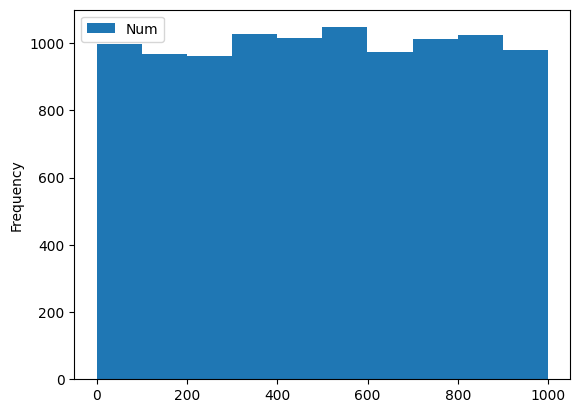

In [148]:
df.plot(kind='hist')

        Num
0  1.423739
1 -1.788569
2  0.281287
3  0.007408
4 -0.345107
                 Num
count  800000.000000
mean       -0.000575
std         0.998737
min        -4.677432
25%        -0.673670
50%        -0.000098
75%         0.673547
max         4.459920
Axes(0.125,0.11;0.775x0.77)


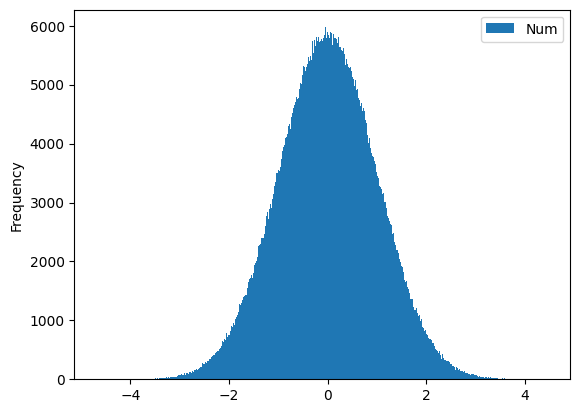

In [174]:
# Q. 평균 0, 표준편차 1인 표준정규분포 난수 10000개로 데이터프레임 생성.
# 통계요약표 및 시각화를 수행하세요(컬렴명 'Num')
data = np.random.randn(800000)
df = pd.DataFrame(data, columns=['Num'])
print(df.head())
print(df.describe())
print(df.plot(kind='hist', bins=500))

In [175]:
print(df.Num.mean())
print(df.Num.std())

-0.0005749124561709556
0.998736718454499


         Num
0  13.248691
1   8.776487
2   8.943656
3   7.854063
4  11.730815
                Num
count  10000.000000
mean      10.019545
std        1.997672
min        2.687120
25%        8.674150
50%       10.016908
75%       11.343618
max       18.053698


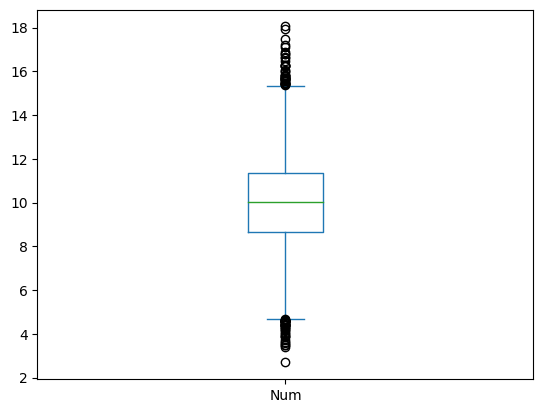

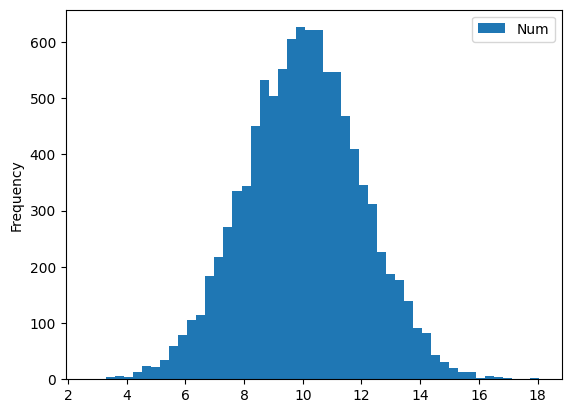

In [187]:
from scipy import stats
np.random.seed(1)
sample1 = stats.norm.rvs(loc=10, scale=2, size=10000) # 평균 10, 표준편차 2, 샘플 10000
df1 = pd.DataFrame(sample1, columns=['Num'])
print(df1.head())
print(df1.describe())
df1.plot(kind='box')
df1.plot(kind='hist', bins=50)
plt.show()

In [190]:
df = pd.DataFrame(np.random.rand(6,4),
                  index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns = ['A','B','C','D'])
print(df)

              A         B         C         D
one    0.919122  0.169110  0.929848  0.150823
two    0.135593  0.995470  0.842857  0.680344
three  0.843496  0.041681  0.404026  0.581456
four   0.670009  0.621954  0.871499  0.552468
five   0.834455  0.384325  0.890471  0.171193
six    0.309035  0.148954  0.712060  0.927528


<Axes: >

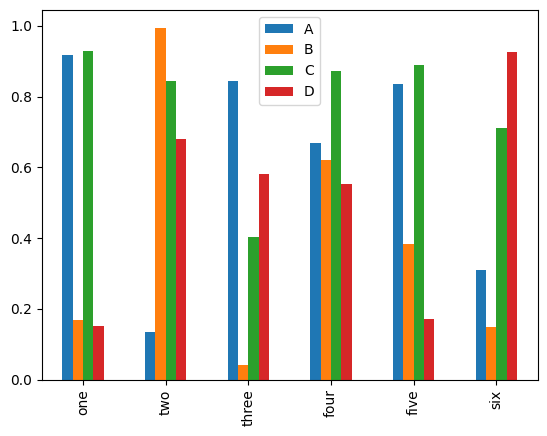

In [192]:
df.plot(kind='bar')

<Axes: >

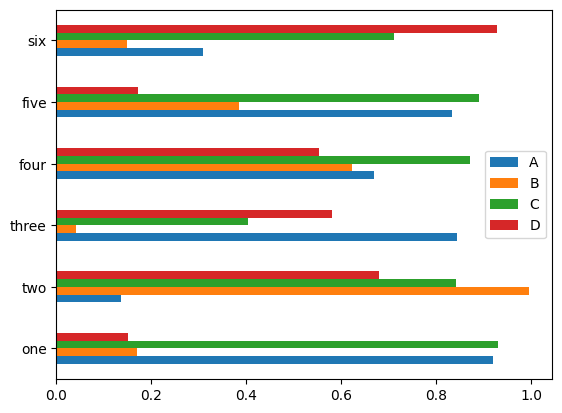

In [193]:
df.plot(kind='barh') # horizon 수평

<Axes: >

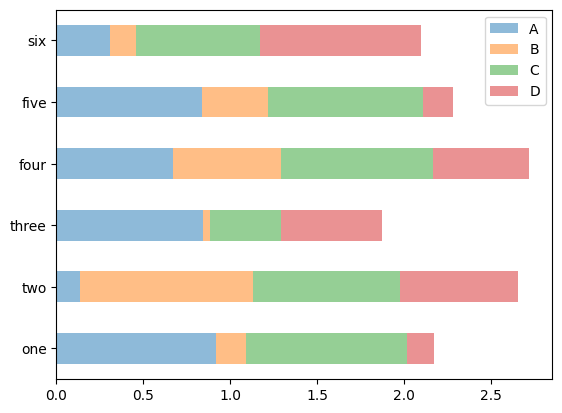

In [201]:
df.plot(kind='barh', stacked=True, alpha=0.5) # stacked 는 한줄에 표시 alpha 는 투명도

Q4_0116. 아래 df에 대하여 수직 막대그래프, 수평 막대그래프, 수직 스택 막대그래프, 수평 스택 막대그래프를 작성하세요.

In [205]:
# Matplotlib을 사용하여 데이터프레임으로 수직, 수평, 수직 스택, 수평 스택 막대그래프 작성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 생성
df = pd.DataFrame(np.random.rand(8,3),
                  index=['P1','P2','P3','P4','P5','P6','P7','P8'],
                  columns=pd.Index(['A','B','C'], name='Species'))
df

Species,A,B,C
P1,0.309733,0.941416,0.820883
P2,0.677161,0.878899,0.841185
P3,0.620937,0.380188,0.658232
P4,0.759985,0.618737,0.011331
P5,0.034815,0.114429,0.749399
P6,0.730874,0.856989,0.943249
P7,0.381795,0.617000,0.327648
P8,0.400072,0.458011,0.767011


<Axes: >

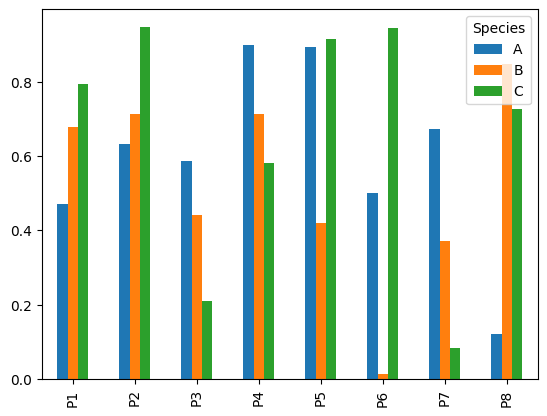

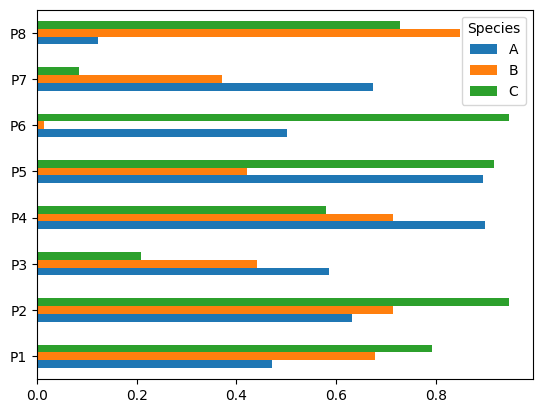

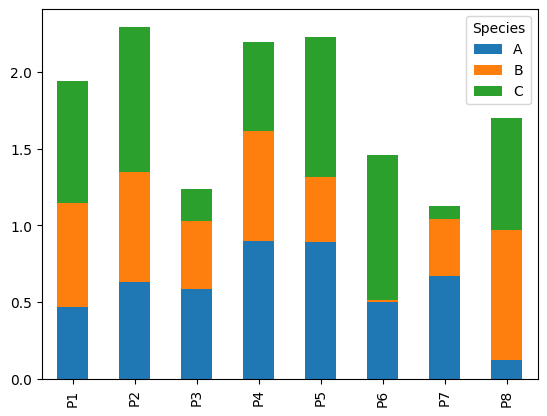

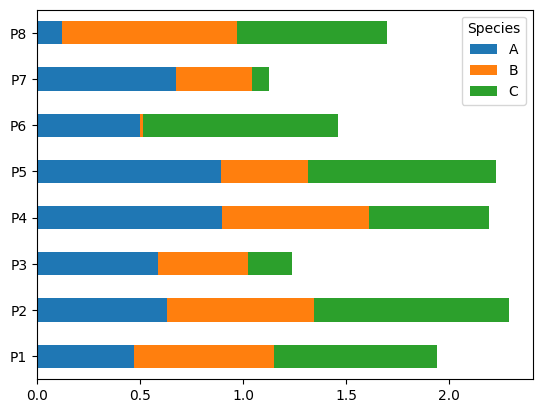

In [208]:
# Q4_0116 유빈님 솔루션
# 샘플 데이터 생성
df = pd.DataFrame(np.random.rand(8,3),
                  index=['P1','P2','P3','P4','P5','P6','P7','P8'],
                  columns=pd.Index(['A','B','C'], name='Species'))

df.plot(kind='bar')
df.plot(kind='barh')
df.plot(kind='bar',stacked=True)
df.plot(kind='barh',stacked=True)

<Axes: >

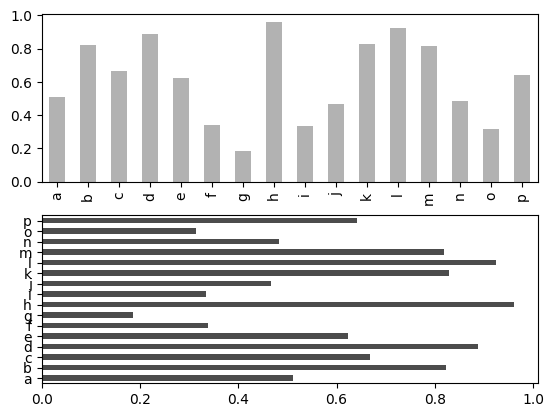

In [209]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.3)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

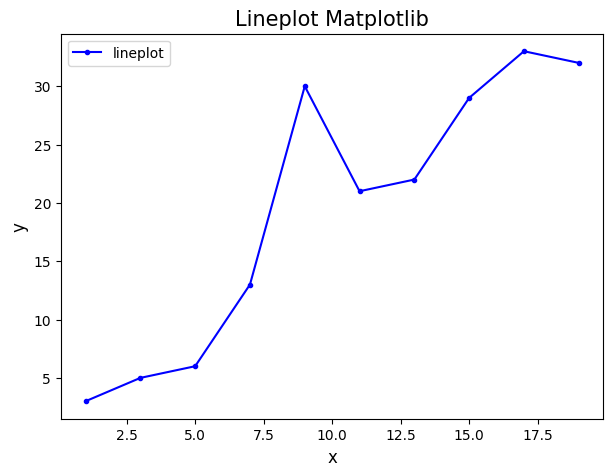

In [245]:
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(7,5))
plt.plot(x, y, color='blue', marker='o', markersize=3)
plt.title('Lineplot Matplotlib', size=15)
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.legend(labels=['lineplot'])

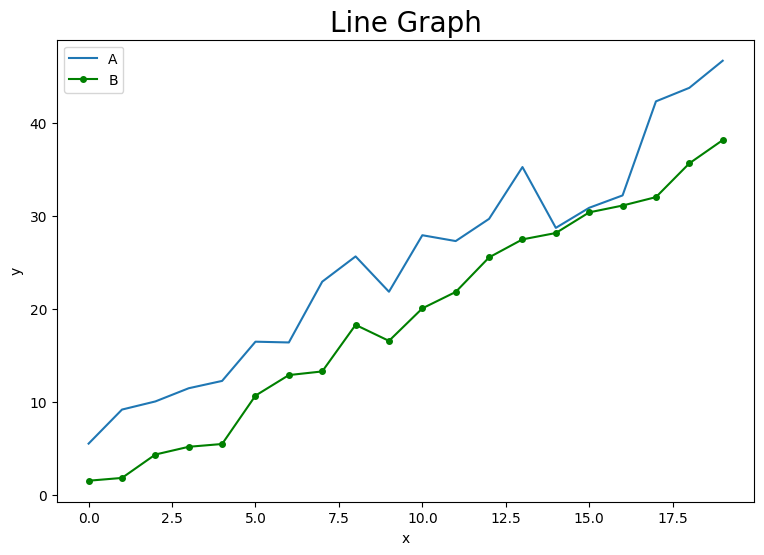

In [265]:
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.rand(20)*10
# y1 = np.arange(20)*2
y2 = np.arange(20)*2 + np.random.randn(20)
plt.figure(figsize=(9,6))
plt.plot(x,y1)
plt.plot(x,y2,color='green',marker='o',markersize=4)
plt.xlabel('x',size=10)
plt.ylabel('y',size=10)
plt.title('Line Graph',size=20)
plt.legend(['A','B'])

range(0, 15)
[9 5 8 1 5 1 7 5 3 5 7 4 4 8 9]


Text(0.5, 0, 'x')

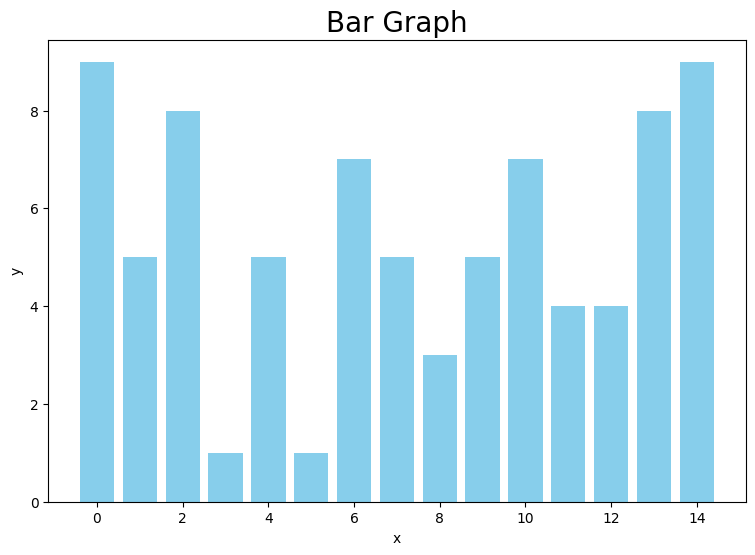

In [296]:
# 과제 - 추가 decoration
# 막대 그래프
y = np.random.randint(1,10,size=15)
x = range(len(y))
print(x)
print(y)
plt.figure(figsize=(9,6))
plt.bar(x,y,width=0.8,color='skyblue')
plt.title('Bar Graph',size=20)
plt.ylabel('y')
plt.xlabel('x')

Text(0.5, 0, 'mpg')

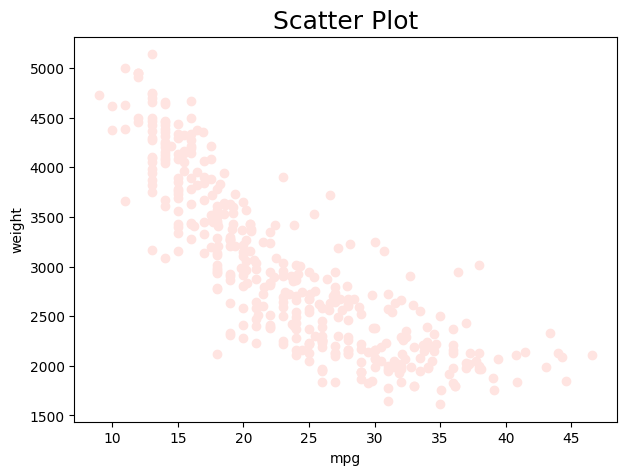

In [319]:
# scatter plot
df_auto = pd.read_excel('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/auto-mpg.xlsx')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(7,5))
plt.scatter(x,y,color='mistyrose')
plt.title('Scatter Plot', size=18)
plt.ylabel('weight')
plt.xlabel('mpg')

(array([ 3.,  4.,  6., 39., 17., 22., 16., 36., 21., 19., 14., 28., 16.,
        21., 17., 22., 12., 14., 16., 11., 11., 10.,  6.,  6.,  2.,  3.,
         0.,  3.,  2.,  1.]),
 array([ 9.        , 10.25333333, 11.50666667, 12.76      , 14.01333333,
        15.26666667, 16.52      , 17.77333333, 19.02666667, 20.28      ,
        21.53333333, 22.78666667, 24.04      , 25.29333333, 26.54666667,
        27.8       , 29.05333333, 30.30666667, 31.56      , 32.81333333,
        34.06666667, 35.32      , 36.57333333, 37.82666667, 39.08      ,
        40.33333333, 41.58666667, 42.84      , 44.09333333, 45.34666667,
        46.6       ]),
 <BarContainer object of 30 artists>)

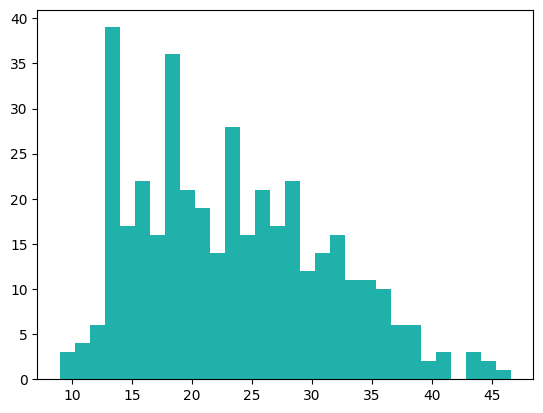

In [324]:
# histogram
plt.hist(df_auto.mpg,bins=30,color='lightseagreen')

In [ ]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])

ax1.hist(np.random.randn(100), bins=20, color='lightsteelblue', alpha=0.3)
ax2.hist(np.random.randn(1000), bins=20, color='navy', alpha=0.5)
ax3.plot(np.random.randn(50).cumsum(),'b--')
# ax3.plot(np.random.randn(50).cumsum(), color='yellow', linestyle='--')
# ax3.plot(x,y,'k--')

ax4.scatter(np.arange(100), np.arange(100)+3*np.random.randn(100))

Q5_0116. 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

<BarContainer object of 10 artists>

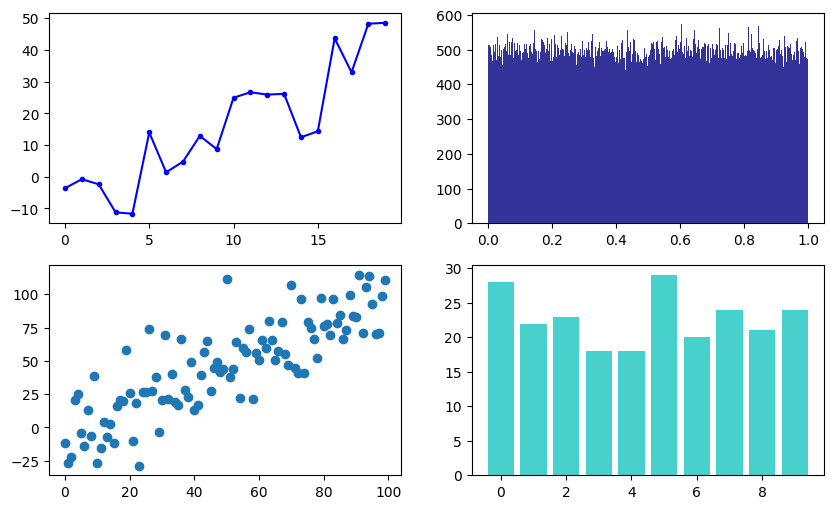

In [385]:
# Q5_0116 솔루션
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = np.arange(1,31,2)
y = np.array([np.random.randint(10)])

# ax1.hist(np.random.randn(300000), bins=300, color='cornflowerblue', alpha=0.9)
ax1.plot(np.arange(20),(np.arange(20)*2 + np.random.randn(20)*10),color='blue',marker='o',markersize=3)
ax2.hist(np.random.rand(1000000), bins=2000, color='navy', alpha=0.8)
ax3.scatter(x = np.arange(100), y = np.arange(100) + np.random.randn(100)*20)
ax4.bar(np.arange(10), np.random.randint(15,30,10), color="mediumturquoise")
# ax3.plot(np.random.randn(150).cumsum(), 'g--')
# ax4.scatter(np.arange(100), np.arange(100)+3*np.random.randn(100), color="mediumturquoise")

<BarContainer object of 5 artists>

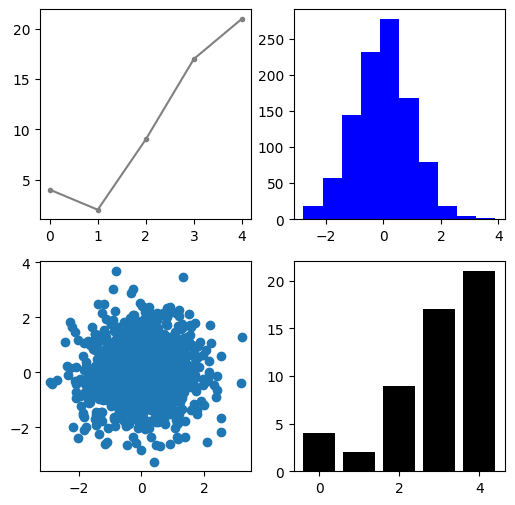

In [386]:
# Q5_0116 주승님 솔루션
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (6,6))

section1 = fig.add_subplot(2,2,1)
section2 = fig.add_subplot(2,2,2)
section3 = fig.add_subplot(2,2,3)
section4 = fig.add_subplot(2,2,4)

x = np.arange(5)
y = np.array([4,2,9,17,21])

section1.plot(x, y, color = 'gray', marker = 'o', markersize = 3)
section2.hist(np.random.randn(1000), color = 'blue')
section3.scatter(np.random.randn(1000), np.random.randn(1000))
section4.bar(x, y, color = 'black')

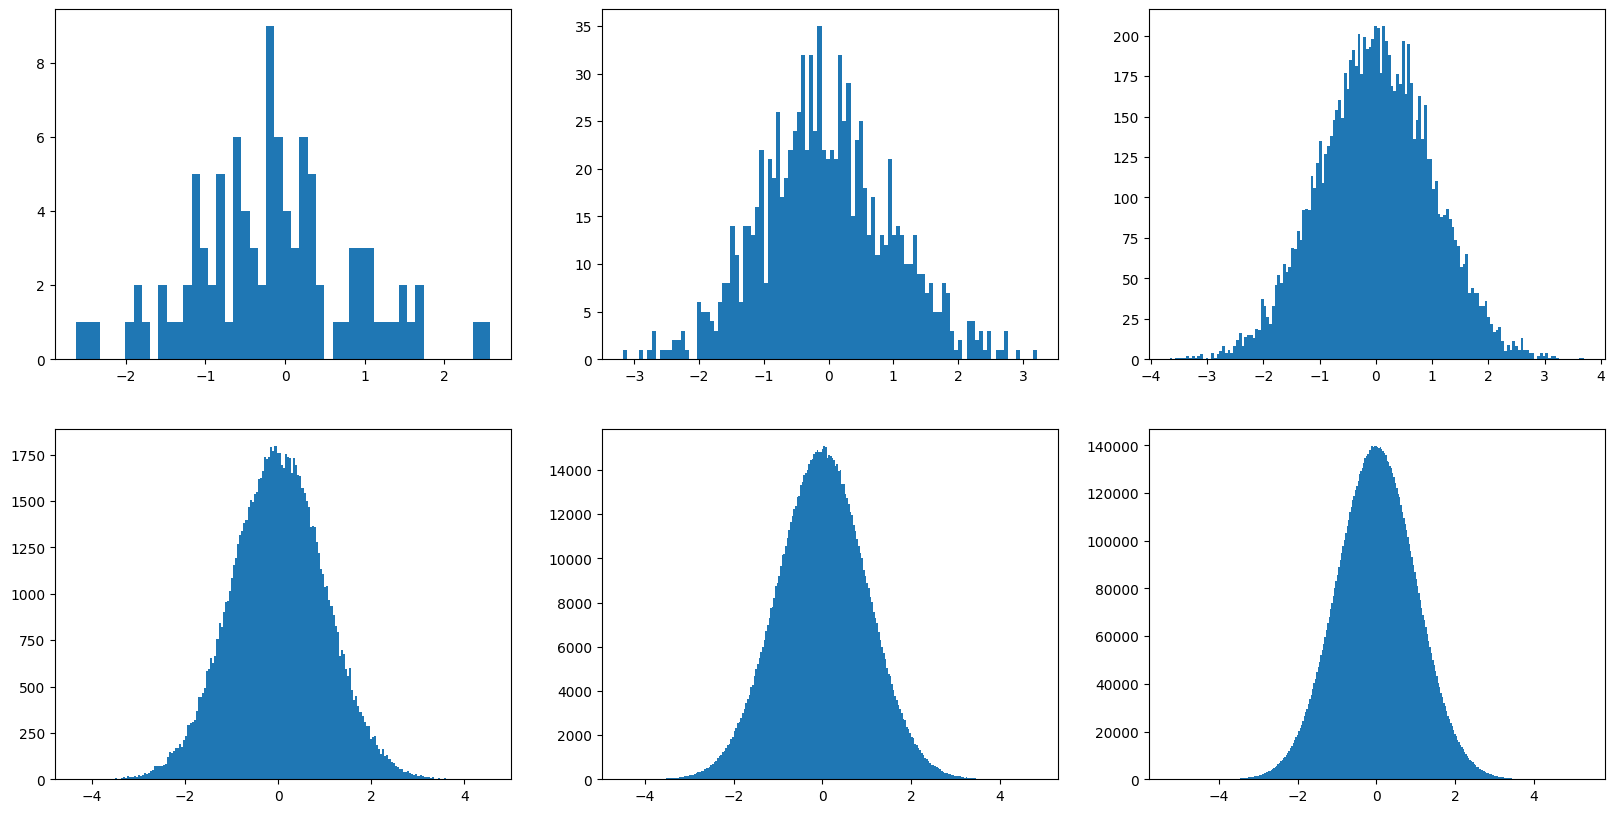

In [400]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes[0,0].hist(np.random.randn(100), bins=50)
axes[0,1].hist(np.random.randn(1000), bins=100)
axes[0,2].hist(np.random.randn(10000), bins=150)
axes[1,0].hist(np.random.randn(100000), bins=200)
axes[1,1].hist(np.random.randn(1000000), bins=250)
axes[1,2].hist(np.random.randn(10000000), bins=300)

Q6_0116. plt.subplots를 사용하여 선그래프, 히스토그램, 산점도, 막대그래프 4개의 subplot으로 구성된 2 x 2 그래프를 작성하세요.

<BarContainer object of 100 artists>

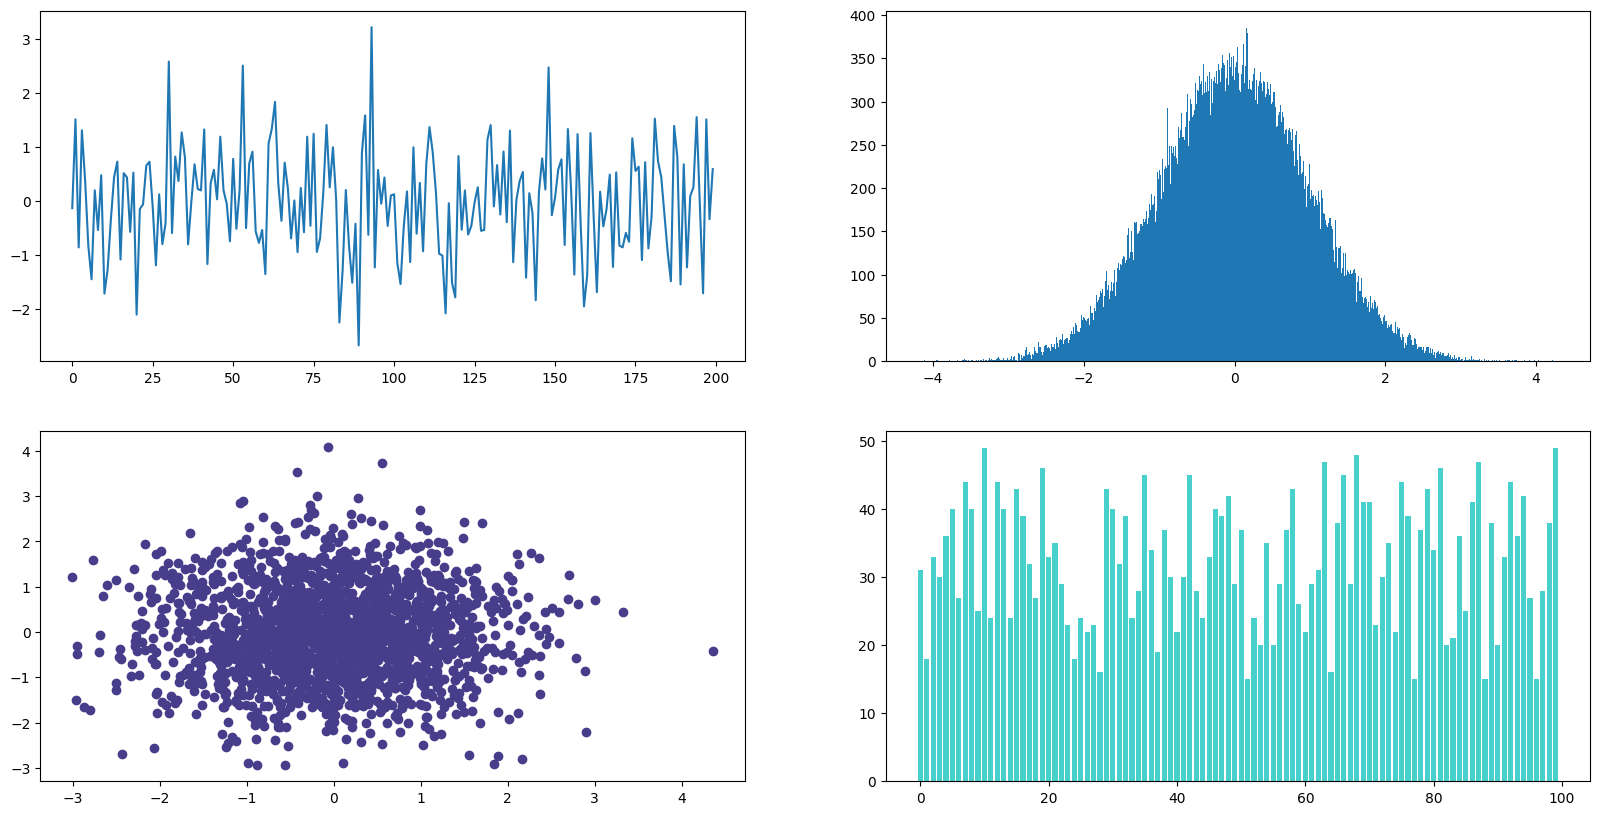

In [422]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
axes[0,0].plot(np.arange(200), np.random.randn(200))
axes[0,1].hist(np.random.randn(100000), bins=1000)
axes[1,0].scatter(np.random.randn(2000), np.random.randn(2000), color="darkslateblue")
axes[1,1].bar(np.arange(100), np.random.randint(15,50,100), color="mediumturquoise")

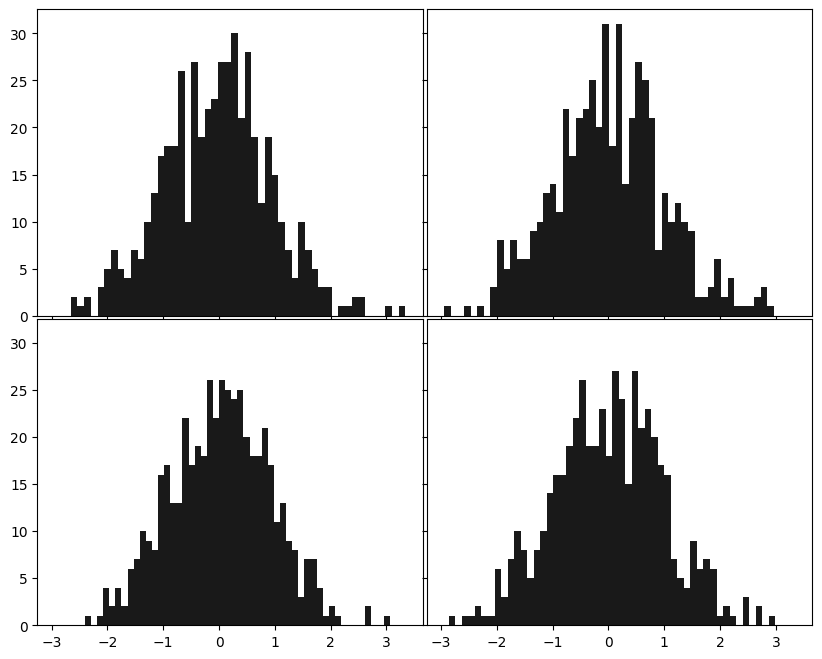

In [424]:
fig, axes = plt .subplots(2,2, figsize=(10,8), sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.9)
plt.subplots_adjust(wspace=0.01, hspace=0.01)

In [425]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
# 설치 후 세션 다시 시작
# Google Colab에는 한국어 글꼴이 사전 설치되어 있지 않으므로 수동으로 설치
!sudo apt-get install -y fonts-nanum # 'NanumBarunGothic' 글꼴을 설치
!sudo fc-cache -fv # 글꼴 캐시를 새로 고치고
!rm -/.cache/matplotlib -rf # Matplotlib 캐시를 지운다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import numpy as np
np.random.seed(0)
data = np.random.randn(1000)
cdata = data.cumsum()
print(data[:10])
cdata[:10]

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


array([1.76405235, 2.16420955, 3.14294754, 5.38384074, 7.25139873,
       6.27412085, 7.22420927, 7.07285206, 6.96963321, 7.38023171])

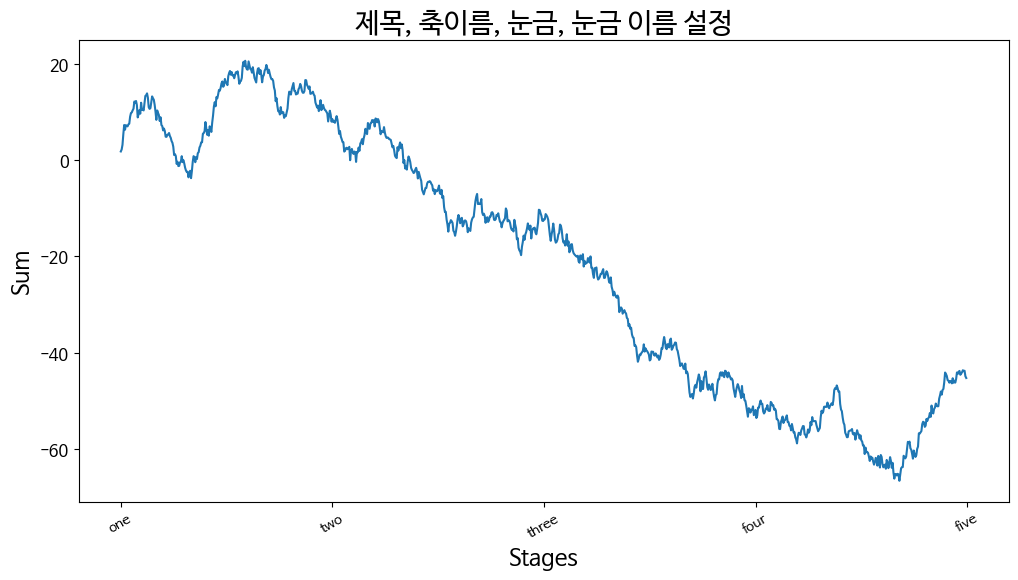

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rc('font', size=12, family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(cdata)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                            rotation=30,fontsize='small')
ax.set_title('제목, 축이름, 눈금, 눈금 이름 설정', size=20)
ax.set_xlabel('Stages',size=16)
ax.set_ylabel('Sum',size=16)
plt.show()

Q7_0116. 임의의 수치 데이터를 생성하고, 이를 이용해 sin(x) 그래프를 그리세요.
- x축과 y축에 적절한 레이블을 추가하세요.
- 그래프에 제목을 추가하세요.

In [ ]:
# Q7_0116 솔루션


Q8_0116. 정규 분포를 따르는 임의의 데이터를 생성한 후 아래를 수행하세요.
- 생성된 데이터를 사용하여 히스토그램을 그리세요.
- 히스토그램의 빈(bin) 수를 조정해 보세요.

Q9_0116. 두 개의 연관된 변수를 가지는 데이터셋을 생성 (예: 키와 몸무게) 한 후 아래를 수행하세요.
- 이 데이터를 사용하여 산점도를 그리세요.
- x축과 y축에 적절한 레이블과 제목을 추가하세요.

Q10_0116. 여러 개의 서로 다른 데이터셋을 생성한 후 이 데이터셋을 사용하여 하나의 창(window)에 여러 개의 서브플롯에 다른 유형의 그래프를 그려보세요. (예: 선 그래프, 막대 그래프, 산점도, 히스토그램).